<center><h1>Exercício 3 - Melbourn Housing Market 
    <h2><center>Fernando Nast

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
import glob
import folium

from IPython.display         import HTML
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model    import LinearRegression
from sklearn.preprocessing   import MinMaxScaler
from sklearn.metrics         import mean_absolute_error
from sklearn.ensemble        import RandomForestRegressor
from sklearn                 import metrics
# as de sklearn estão proximos de onde foram usadas

In [2]:
# Esconder o codigo

HTML('''
<script>
function mudarNome()
{
     if(document.getElementById("button").value == "Hide")
     {
        document.getElementById("button").value = "Code";
        $('div.input').hide();
     } 
     else
     {
          document.getElementById("button").value = "Hide";
          $('div.input').show();
     }
}
</script>

<body>
    <input type="button" id="button" onclick="mudarNome();" value="Hide" />
</body>''')

In [3]:
filepath = 'data_raw_Melbourne_housing_FULL.csv'
mel = pd.read_csv(filepath)

Uma breve visualização dos dados do exercício:

In [4]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## 1. Tipos de Variáveis

<j>Especificar os tipos de variáveis de algumas colunas (mais do que apenas "object"). Mudar para tipo "Datetime" a coluna DATA.

In [5]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
colnam = mel.select_dtypes('object').columns
colnam

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [7]:
for n in colnam:
    mel[n] = mel[n].astype('category')

In [8]:
mel['Date'] = pd.to_datetime(mel['Date'])

In [9]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

### 1.1. Variáveis Numéricas

Abaixo é apresentado uma tabela estatística com uma primeira vista das informações numéricas. Uma observação a ser feita é quanto ao tipo de dado apresentado por "Postcode", que está como NUMERIC, quando poderia ser tratado como CATEGORY.

In [10]:
mel.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [11]:
mel['Postcode'] = mel['Postcode'].astype('category')

In [12]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

### 1.2. Variáveis Duplicadas

Há no dataset variáveis com as mesmas informações, como "Room" e "Badroom2". Segundo a descrição dos dados (em "data_raw_data_description_Melbourn.txt") os dois apresentam o número de quartos, mas "Bedroom2" foi obtido em uma fonte diferente. A seguir é verificado se há uma diferença significativa para retirar alguma dessas colunas, ordenando em quantidade de quartos e o numero de casas que possui essa quantidade.

In [13]:
print(mel['Rooms'].value_counts().sort_index())
print(mel['Rooms'].value_counts().sum())

print('\n\n',mel['Bedroom2'].value_counts().sort_index())
print(mel['Bedroom2'].value_counts().sum())

avaliacao = mel['Rooms'].value_counts().sort_index()
avaliacao2 = mel['Bedroom2'].value_counts().sort_index()

1      1479
2      8332
3     15084
4      7956
5      1737
6       204
7        32
8        19
9         4
10        6
12        3
16        1
Name: Rooms, dtype: int64
34857


 0.0        17
1.0       966
2.0      5777
3.0     11881
4.0      6348
5.0      1427
6.0       168
7.0        30
8.0        13
9.0         5
10.0        4
12.0        1
16.0        1
20.0        1
30.0        1
Name: Bedroom2, dtype: int64
26640


Há pouca diferença entre as colunas, o que favorece a retirada de "Bedroom2", que é a que possui menor número de informações.

In [14]:
mel.drop(['Bedroom2'],axis=1,inplace=True)

### 1.3. Construindo Variável

O ano de construção da casa (expressado na coluna "YearBuilt"), que quer expressar a idade da casa, pode ser substituida por apenas o valor desta, ao invés do ano.

In [15]:
mel['Age'] = pd.datetime.now().year - mel['YearBuilt']

<ipython-input-15-519114d414e6>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mel['Age'] = pd.datetime.now().year - mel['YearBuilt']


### 1.4. Falta de Dados

Identificar a quantidade de valores nulos no dataset. Os dados existentes e a seguir a porcentagem dos valores nulos de cada dado

In [16]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      26881 non-null  float64 
 17  Longtitude     26881 non-null  

In [17]:
mel.isnull().sum()/len(mel)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
dtype: float64

Há dados com muitos valores nulos, como "BuildingArea" e "YearBuild". Dessa forma, podemos trabalhar de duas formas: retirando as linhas com dados faltando ou utilizar a imputação. Aqui, farei das duas formas para avaliar qual o melhor método.

## 2. Trabalhando sem Imputação

Retirando todos as linhas com dados faltando.

In [18]:
mel_semImp = mel.dropna()

In [19]:
mel_semImp.shape

(8887, 21)

### 2.1. Análise Exploratória

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


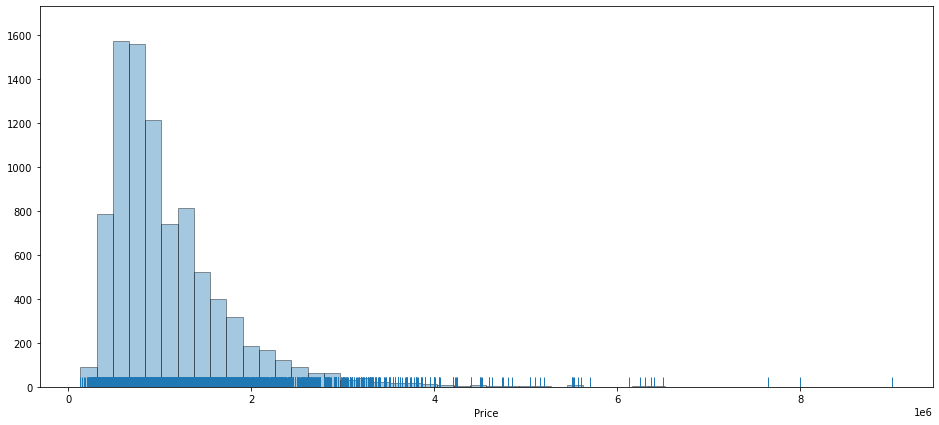

In [20]:
plt.figure(figsize=(16,7))
ax = sns.distplot(mel_semImp['Price'],kde=False,rug=True,hist_kws=dict(edgecolor='k'))

In [21]:
mel_semImp[mel_semImp['Price']>=6000000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,...,3.0,1334.0,365.0,1890.0,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,131.0
10451,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,2016-10-15,4.6,3142.0,...,2.0,564.0,342.0,2000.0,Stonnington City Council,-37.84860,145.02440,Southern Metropolitan,7217.0,21.0
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,...,4.0,2079.0,464.3,1880.0,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,141.0
15696,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,...,4.0,1690.0,284.0,1863.0,Boroondara City Council,-37.82652,145.03052,Southern Metropolitan,11308.0,158.0
19583,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,...,1.0,744.0,117.0,1960.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,61.0
20684,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,...,1.0,553.0,308.0,1920.0,Port Phillip City Council,-37.84908,144.95753,Southern Metropolitan,2019.0,101.0
24556,Middle Park,307 Beaconsfield Pde,4,h,6370000.0,S,Greg,2017-10-14,3.0,3206.0,...,3.0,476.0,279.0,1893.0,Port Phillip City Council,-37.85601,144.96596,Southern Metropolitan,2019.0,128.0
26147,Malvern East,33 Grant St,5,h,6125000.0,S,Marshall,2017-10-28,8.4,3145.0,...,2.0,1384.0,340.0,1982.0,Stonnington City Council,-37.87181,145.05288,Southern Metropolitan,8801.0,39.0
33498,Malvern,13 Wilks Av,5,h,6300000.0,S,RT,2018-03-17,5.9,3144.0,...,4.0,900.0,435.0,1930.0,Stonnington City Council,-37.84802,145.03341,Southern Metropolitan,4675.0,91.0


A variável dependente que estamos querendo predizer é a "Price". No gráfico acima é possível verificar que a mesma possui uma distribuição normal com distorção à direita, possuindo apenas 9 casas com o preço acima de $ 6 milhões.  

Podemos analisar também a relação das variáveis categóricas, são elas:

In [22]:
mel_semImp.select_dtypes('category').columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode',
       'CouncilArea', 'Regionname'],
      dtype='object')

Das quais, podemos sintetisar, para uma breve análise, as variáveis "Suburb", "Address", e "Postcode" na variável "Regionname", por exemplo. Será descartada também a análise os conselhos de cada área ("CouncilArea") e os corretores de imóveis (os "SellerG").

In [23]:
mel_semImp['Regionname'].unique()

['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']
Categories (8, object): ['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']

In [24]:
# Mudando os nomes das regiões para poder dar no gráfico
mel_semImp['Regionname'] = mel_semImp['Regionname'].map({'Northern Metropolitan':'N M','Western Metropolitan':'W M', 
                                                     'Southern Metropolitan':'S M','Eastern Metropolitan':'E M',
                                                     'South-Eastern Metropolitan':'S-E M','Northern Victoria':'N V', 
                                                     'Eastern Victoria':'E V', 'Western Victoria':'W V'})

<ipython-input-24-63c6db93d16e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mel_semImp['Regionname'] = mel_semImp['Regionname'].map({'Northern Metropolitan':'N M','Western Metropolitan':'W M',


Text(0.5, 1.0, 'Regionname vs Price')

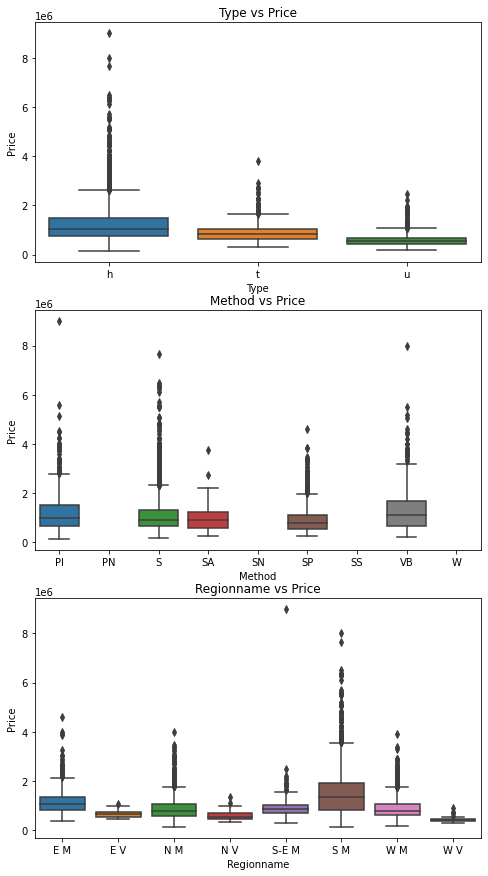

In [25]:
f,axes = plt.subplots(3,1,figsize=(8,15))

sns.boxplot(x=mel_semImp['Type'],y=mel_semImp['Price'],ax=axes[0])
axes[0].set_title('Type vs Price')

sns.boxplot(x=mel_semImp['Method'],y=mel_semImp['Price'],ax=axes[1])
axes[1].set_title('Method vs Price')

sns.boxplot(x=mel_semImp['Regionname'],y=mel_semImp['Price'],ax=axes[2])
axes[2].set_title('Regionname vs Price')

Segundo os gráficos anteriores, podemos inferir os seguintes pontos:
* As médias de preço de do tipo "House" (h) está em torno de \\$ 1M, de "Townhouse" (t) está em torno de \\$ 900k e "Unit" (u) está em torno dos \\$ 500k;
* Os preços dos diferentes tipos de venda possuem uma média parecida, em torno de \\$ 100k;
* A região "Metropolitan" possui médias de preços maiores do que a região "Victoria", onde "Southern Metropolitan" é a que possui a maior média de preço entre todas as regiões.

In [26]:
mel_semImp.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Price'>

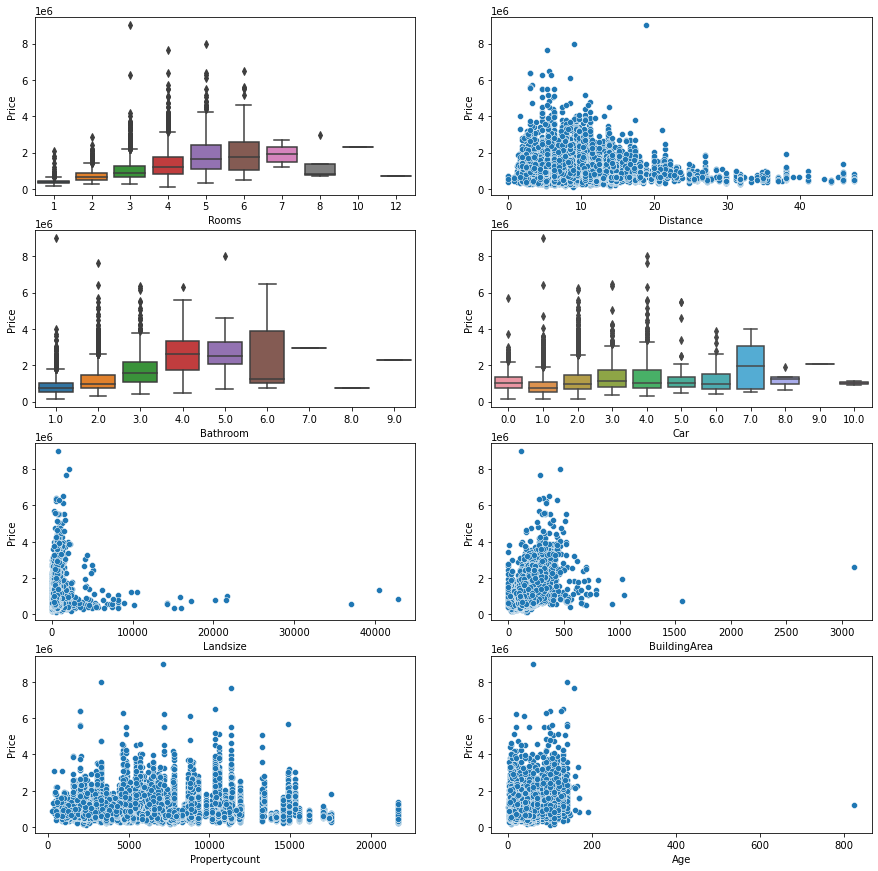

In [27]:
f,axes = plt.subplots(4,2,figsize=(15,15))

sns.boxplot(x=mel_semImp['Rooms'],y=mel_semImp['Price'],ax=axes[0,0])
#axes[0,0].set_title('Rooms vs Price')

sns.scatterplot(x=mel_semImp['Distance'],y=mel_semImp['Price'],ax=axes[0,1])
#axes[0,1].set_title('Distance vs Price')

sns.boxplot(x=mel_semImp['Bathroom'],y=mel_semImp['Price'],ax=axes[1,0])
#axes[1,0].set_title('Bathroom vs Price')

sns.boxplot(x=mel_semImp['Car'],y=mel_semImp['Price'],ax=axes[1,1])
#axes[1,1].set_title('Car vs Price')

sns.scatterplot(x=mel_semImp['Landsize'],y=mel_semImp['Price'],ax=axes[2,0])
#axes[2,0].set_title('Landsize vs Price')

sns.scatterplot(x=mel_semImp['BuildingArea'],y=mel_semImp['Price'],ax=axes[2,1])
#axes[2,1].set_title('BuildingArea vs Price')

sns.scatterplot(x=mel_semImp['Propertycount'],y=mel_semImp['Price'],ax=axes[3,0])
#axes[3,0].set_title('Propertycount vs Price')

sns.scatterplot(x=mel_semImp['Age'],y=mel_semImp['Price'],ax=axes[3,1])
#axes[3,1].set_title('Age vs Price')

Observações:
* Casas que possuem entre 5 e 6 quartos são, em média, mais caras que as demais;
* Existe um número maior de casas próximas do centro, as quais tendem a serem mais caras;
* Casas, que possuem entre 4 e 5 banheiros são, em média, mais caras;
* o maior número de casas estão dentro de uma faixa de idade que vai até os 200 anos.

### 2.2. Análise de distribuição

Dessa forma, poderá ser verificado a necessidade de normalizar e colocar a distribuição dentro da margem [0,1]

In [28]:
mel_semImp.select_dtypes(['float','int']).columns

Index(['Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Age'],
      dtype='object')

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='Age', ylabel='Density'>

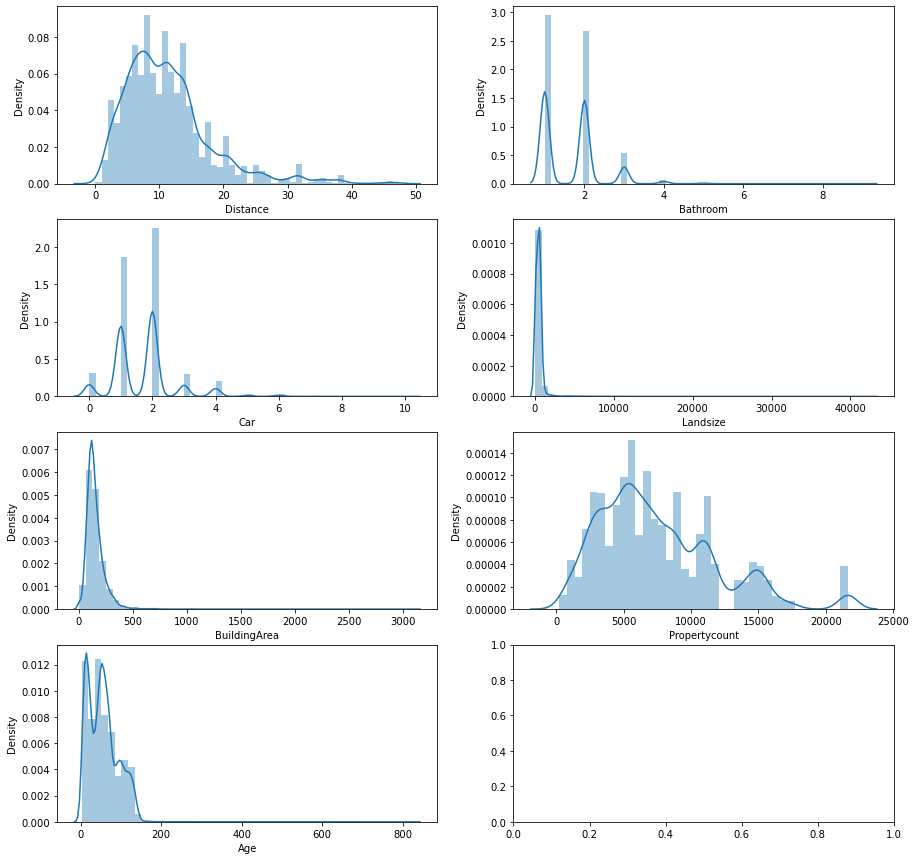

In [29]:
f,axes = plt.subplots(4,2,figsize=(15,15))

sns.distplot(mel_semImp['Distance'],ax=axes[0,0])
sns.distplot(mel_semImp['Bathroom'],ax=axes[0,1])
sns.distplot(mel_semImp['Car'],ax=axes[1,0])
sns.distplot(mel_semImp['Landsize'],ax=axes[1,1])
sns.distplot(mel_semImp['BuildingArea'],ax=axes[2,0])
sns.distplot(mel_semImp['Propertycount'],ax=axes[2,1])
sns.distplot(mel_semImp['Age'],ax=axes[3,0])

* ``Distance`` e ``Age`` serão normalizados;
* ``Landsize`` e ``BuildingArea`` serão normalizados e colocados com intervalo de [0,1];
* ``Propertycount`` será colocado com intervalo de [0,1].

In [30]:
mms = MinMaxScaler()

In [31]:
mel_rescala = mel_semImp.copy()
mel_rescala['Distance'] = np.log1p(mel_semImp['Distance'])
mel_rescala['Age'] = np.log1p(mel_semImp['Age'])
mel_rescala['Landsize'] = np.log1p(mel_semImp['Landsize'])
mel_rescala['BuildingArea'] = np.log1p(mel_semImp['BuildingArea'])

mel_rescala['Propertycount'] = mms.fit_transform(mel_semImp[['Propertycount']].values)

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='Age', ylabel='Density'>

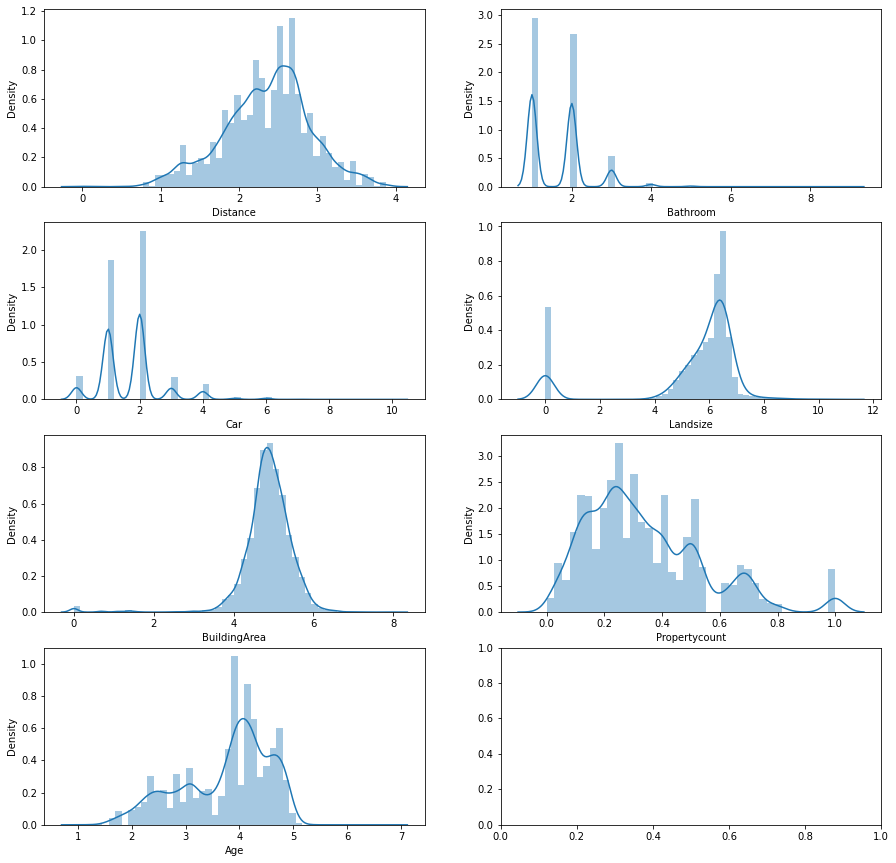

In [32]:
f,axes = plt.subplots(4,2,figsize=(15,15))

sns.distplot(mel_rescala['Distance'],ax=axes[0,0])
sns.distplot(mel_rescala['Bathroom'],ax=axes[0,1])
sns.distplot(mel_rescala['Car'],ax=axes[1,0])
sns.distplot(mel_rescala['Landsize'],ax=axes[1,1])
sns.distplot(mel_rescala['BuildingArea'],ax=axes[2,0])
sns.distplot(mel_rescala['Propertycount'],ax=axes[2,1])
sns.distplot(mel_rescala['Age'],ax=axes[3,0])

Uma observação sobre as varáveis em questão. Há correlação entre tais variáveis? É o que será apresentado a seguir.

<AxesSubplot:>

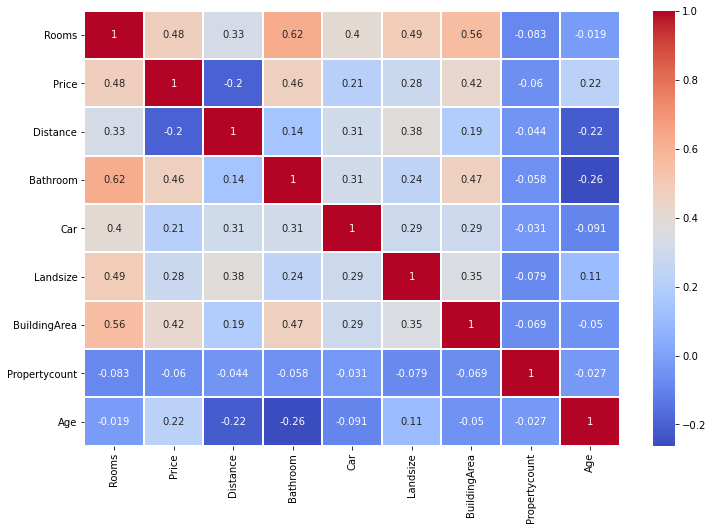

In [33]:
# Correlação entre as variaveis

correl = mel_rescala[['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','Propertycount','Age']]

plt.figure(figsize=(12,8))
sns.heatmap(correl.corr(),annot=True,cmap='coolwarm',linewidths=1)

As variáveis "Distance" e "Propertycount" são as únicas com correlação negativa com preço, ou seja, quanto mais longe do centro e com mais casas ao redor, mais barata se torna a casa. As demais variáveis possuem correlação positiva. Vale ressaltar que correlação entre as variáveis não significa causalidade.

In [34]:
mel_semImp['Lattitude'].shape

(8887,)

In [35]:
mel_semImp[mel_semImp['Price']<=1000000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,1.0,0.0,94.0,2009.0,Yarra City Council,-37.80780,144.99650,N M,4019.0,12.0
37,Abbotsford,42 Valiant St,2,h,890000.0,S,Biggin,2016-09-17,2.5,3067.0,...,1.0,150.0,73.0,1985.0,Yarra City Council,-37.80110,145.00040,N M,4019.0,36.0
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,1.0,0.0,60.0,1970.0,Yarra City Council,-37.80150,144.99720,N M,4019.0,51.0
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,N M,4019.0,8.0
66,Airport West,154 Halsey Rd,3,t,840000.0,PI,Nelson,2016-03-09,13.5,3042.0,...,1.0,303.0,225.0,2016.0,Moonee Valley City Council,-37.71800,144.87800,W M,3464.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34831,Westmeadows,35 Arnside Cr,4,h,675000.0,S,YPA,2018-02-24,16.5,3049.0,...,5.0,560.0,148.0,1980.0,Hume City Council,-37.68089,144.87403,N M,2474.0,41.0
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,2018-02-24,25.5,3750.0,...,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,N M,2940.0,5.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750.0,...,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,N M,2940.0,9.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,W M,6543.0,3.0


In [36]:
from folium import plugins

coordenadas = []
lat = mel_semImp['Lattitude'][:8887].values
long = mel_semImp['Longtitude'][:8887].values
price = mel_semImp['Price'][:8887].values

mapa = folium.Map(location=[-35.3081,149.124],zoom_start=4)

for la,lo,pr in zip(lat,long,price):
   #folium.Marker([la,lo]).
   coordenadas.append([la,lo,pr])

#preco_max = float(price.max())
mapa.add_child(plugins.HeatMap(coordenadas,min_opacity=0.1,radius=17, blur=15,max_zoom=20))
mapa

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

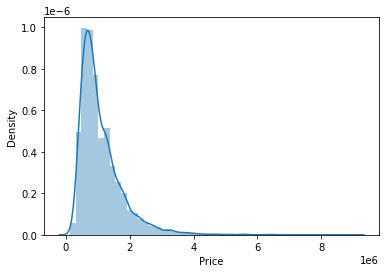

In [152]:
sns.distplot(mel_rescala['Price'])

### 2.2. Predição por Regressão Linear

Criando a variável de treino, X, e a de target, y. Em seguida, utilizando sklearn para fazer o split, criando assim as variáveis de treino e teste.

In [37]:
X = mel_rescala[['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','Propertycount','Age']]

y = mel_rescala['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [38]:
regressao = LinearRegression()

In [39]:
regressao.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = regressao.predict(X_test)

#### 2.2.1. Avaliando a Regressão

Utilizando os valores preditos pela regressão realizada. Serão usados as seguintes métricas:
* a Erro Absoluto Médio (EAM, ou ***MAE*** em inglês), é a média das diferenças entre o valor predito e o valor teste; 
* o Erro Quadrático Médio (EQM, ou ***MSE*** em inglês), é similiar ao MAE, porém mais sensível a grandes diferenças, pois as eleva ao quadrado;
* Raiz do Erro Quadrático Médio (REQM, ou ***RMSE*** em inglês), é uma adição ao MSE, pois utiliza este para tirar raiz quadrada, fazendo com que o erro fique na mesma escala da nossa análise.

In [41]:
print('MAE: ',round(metrics.mean_absolute_error(y_test,y_pred),2))
print('MSE: ',round(metrics.mean_squared_error(y_test,y_pred),2))
print('RMSE: ',round(math.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))

# Os valoes antes da rescala eram
# MAE:  310662.06
# MSE:  261759078315.04
# RMSE:  511623.96

MAE:  324315.88
MSE:  248355569538.52
RMSE:  498352.86


In [42]:
print('r^2: ',round(metrics.r2_score(y_test,y_pred),4))

#Valor antes da rescala
# r^2:  0.4693

r^2:  0.4965


Caso a predição fosse perfeita, MEA seria zero, mas não era o valor esperado, até pela natureza do problema que não é linear. O $r^2$ nos revela que a regressão possui, aproximadamente, $50\%$ de precisão.

In [150]:
# Funcao R^2 Ajustado

def adjusted_r2(y_test, y_pred,X_train):
    adj_r2 = (1 - ((1 - metrics.r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
    return adj_r2

In [151]:
# R^2 Ajustado
adjusted_r2(y_test, y_pred,X_train)

0.4942111118579736

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Predict')

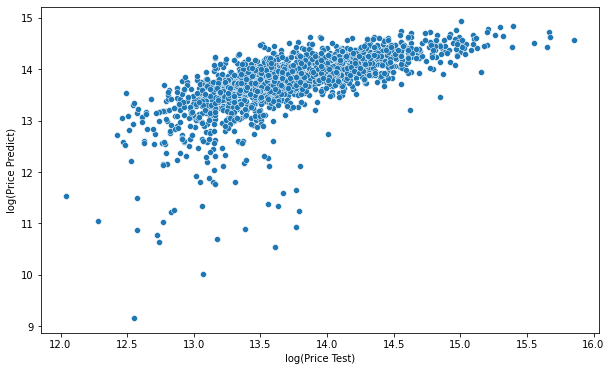

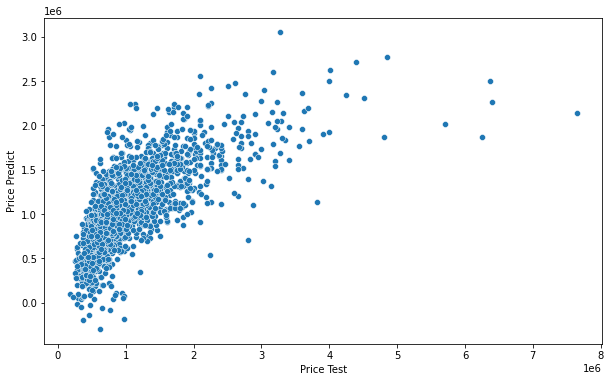

In [43]:
Y_test = pd.Series(len(y_test))
Y_pred = np.ndarray(len(y_pred))

for x in y_test.index:
    Y_test[x] = math.log(y_test[x])
Y_test.drop([0],inplace=True)

for y in range(len(y_pred)):
    Y_pred[y] = math.log(abs(y_pred[y]))
    
plt.figure(figsize=(10,6))
sns.scatterplot(Y_test,Y_pred)
plt.xlabel('log(Price Test)');plt.ylabel('log(Price Predict)')
plt.figure(figsize=(10,6))
sns.scatterplot(y_test,y_pred)
plt.xlabel('Price Test');plt.ylabel('Price Predict')

In [44]:
pd.DataFrame(regressao.coef_,index=X.columns,columns=['Coeficientes'])

,Coeficientes
Rooms,152480.122863
Distance,-458756.251483
Bathroom,278777.758859
Car,44656.900921
Landsize,44547.781929
BuildingArea,189827.100832
Propertycount,-44258.843180
Age,180037.612134


Trabalhando apenas com as variáveis numéricas, foi usado a regresão linear como uma abordagem inicial sobre predição de preço. Na tabela acima estão os coeficientes econtrados para cada variável, onde significam que (considerando as demais variáveis constantes):
* **Rooms**: no acrescimo de um quarto, a casa possui um incremento de **\\$ 115.142,92**;
* **Distance**: a cada kilometro a mais de distância da casa para o centro, o preço decresce em **\\$ 27.487,64**;
* **Bathroom**: a cada banheiro a mais, o preço aumenta em **\\$ 220.257,15**;
* **Car**: a cada vaga de carro a mais, o preço aumenta em **\\$ 47.805,18**;
* **Landsize**: a cada metro a mais de terra, o preço aumenta em **\\$ 20,30**;
* **BuildingArea**: a cada metro a mais de construção, o preço aumenta em **\\$ 2.673,25**;
* **Propertycount**: a cada propriedade a mais naquela área, o preço cai em **\\$ 0,87**;
* **Age**: A cada ano que passa, a propriedade possui um aumento no preço de **\\$ 5.739,65**;

## 3. Trabalhando com Imputação

Adicionando valores aos espaços vazios.

In [45]:
mel.shape

(34857, 21)

In [46]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,121.0


In [47]:
mel['Suburb'].unique()

['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Fawkner Lot', 'Ferny Creek', 'Wandin North', 'Kalkallo', 'Menzies Creek']
Length: 351
Categories (351, object): ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', ..., 'Ferny Creek', 'Wandin North', 'Kalkallo', 'Menzies Creek']

In [48]:
############################################ TENTANDO TIRAR OS NUMEROS DE "ADDRESS" ########################################
#cep = pd.DataFrame()
#for endereco in strmel['Address']:
#    cep['Address']=glob.re.sub('.*\d ','',str(endereco))

In [49]:
#str(mel['Address'])
#cep

In [50]:
mel.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Age'],
      dtype='object')

In [51]:
colunas_interesse = ['Rooms', 'Type','Distance','Bathroom', 'Car', 'Landsize','BuildingArea',
                     'Regionname', 'Age','Propertycount','Price']

In [52]:
df = mel.copy()

In [53]:
df = df[colunas_interesse]

In [54]:
df.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Age,Propertycount,Price
0,2,h,2.5,1.0,1.0,126.0,NaN,Northern Metropolitan,NaN,4019.0,NaN
1,2,h,2.5,1.0,1.0,202.0,NaN,Northern Metropolitan,NaN,4019.0,1480000.0
2,2,h,2.5,1.0,0.0,156.0,79.0,Northern Metropolitan,121.0,4019.0,1035000.0
3,3,u,2.5,2.0,1.0,0.0,NaN,Northern Metropolitan,NaN,4019.0,NaN
4,3,h,2.5,2.0,0.0,134.0,150.0,Northern Metropolitan,121.0,4019.0,1465000.0


In [55]:
df.shape

(34857, 11)

In [56]:
# Me fornecendo quanto, na mediana ou média, a construção ocupa do terreno
print('Mediana da area construida no terreno:',df['Landsize'].median()/df['BuildingArea'].median())
print('Média da area construida no terreno:',df['Landsize'].mean()/df['BuildingArea'].mean())

razao_landsize_buildingarea = df['Landsize'].median()/df['BuildingArea'].median()

Mediana da area construida no terreno: 3.8308823529411766
Média da area construida no terreno: 3.704057947393252


In [57]:
def add_nan_buildingarea(row):
    return row['Landsize']/razao_landsize_buildingarea if \
                pd.isnull(row['BuildingArea']) else row['BuildingArea']

def add_nan_landsize(row):
    return row['BuildingArea']*razao_landsize_buildingarea if \
                pd.isnull(row['Landsize']) else row['Landsize']


mediaLand  = df['Landsize'].mean()
mediaBuild = df['BuildingArea'].mean()

def remove_nan_landsize(row):    
    if (pd.isnull(row['Landsize'])):
        return mediaLand
    elif(row['Landsize']==0.0):
        return mediaLand
    else:
        return row['Landsize']    
    
def remove_nan_building(row):    
    if (pd.isnull(row['BuildingArea'])):
        return mediaBuild
    elif(row['BuildingArea']==0.0):
        return mediaBuild
    else:
        return row['BuildingArea']

Se, entre as colunas "Landsize" e "BuildingArea" não existem valores, utilizando um em função do outro, será adicionado um valor. Foi utilizado a Mediana de area construida por terreno para preencher os dados vazios de "BuildingArea" e "Landsize". Foi obtido uma razão entre as medianas de cada variavel (Land/Build) e com ela foi possivel adicionar à "BuildingArea" por Land/Razao e para "Landsize" por Build\*Razao.

In [58]:
df['BuildingArea'] = df.apply(add_nan_buildingarea, axis = 1)
df['Landsize'] = df.apply(add_nan_landsize, axis = 1)

In [59]:
df['BuildingArea'] = df.apply(remove_nan_building, axis = 1)
df['Landsize'] = df.apply(remove_nan_landsize, axis = 1)

In [60]:
df

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Age,Propertycount,Price
0,2,h,2.5,1.0,1.0,126.000000,32.890595,Northern Metropolitan,NaN,4019.0,NaN
1,2,h,2.5,1.0,1.0,202.000000,52.729367,Northern Metropolitan,NaN,4019.0,1480000.0
2,2,h,2.5,1.0,0.0,156.000000,79.000000,Northern Metropolitan,121.0,4019.0,1035000.0
3,3,u,2.5,2.0,1.0,593.598993,160.256400,Northern Metropolitan,NaN,4019.0,NaN
4,3,h,2.5,2.0,0.0,134.000000,150.000000,Northern Metropolitan,121.0,4019.0,1465000.0
...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,6.3,1.0,3.0,593.000000,154.794626,Western Metropolitan,NaN,6543.0,1480000.0
34853,2,h,6.3,2.0,1.0,98.000000,104.000000,Western Metropolitan,3.0,6543.0,888000.0
34854,2,t,6.3,1.0,2.0,220.000000,120.000000,Western Metropolitan,21.0,6543.0,705000.0
34855,3,h,6.3,NaN,NaN,593.598993,160.256400,Western Metropolitan,NaN,6543.0,1140000.0


In [61]:
print('Media de Preços ($):',round(df['Price'].mean(),2))
print('Mediana de Preços ($):',round(df['Price'].median(),2))

Media de Preços ($): 1050173.34
Mediana de Preços ($): 870000.0


Será verificado a quantidade de regiões únicas e se há algum dado vazio.

In [62]:
print('## Regioes:\n',df['Regionname'].value_counts())
print('\n## Dados vazios:',df['Regionname'].isnull().sum())

## Regioes:
 Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

## Dados vazios: 3


In [63]:
df[df['Propertycount'].isnull()]

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Age,Propertycount,Price
18523,2,u,5.1,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,710000.0
26888,2,h,7.7,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,825000.0
29483,3,h,NaN,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,616000.0


In [64]:
df[df['Regionname'].isnull()]

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Age,Propertycount,Price
18523,2,u,5.1,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,710000.0
26888,2,h,7.7,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,825000.0
29483,3,h,NaN,NaN,NaN,593.598993,160.2564,NaN,NaN,NaN,616000.0


In [65]:
df.dropna(subset=['Regionname'],inplace=True)
df.dropna(subset=['Propertycount'],inplace=True)

In [66]:
print('\n## Dados vazios:',df['Regionname'].isnull().sum())
print('\n## Dados vazios:',df['Propertycount'].isnull().sum())


## Dados vazios: 0

## Dados vazios: 0


In [67]:
regiao_dummies = pd.get_dummies(df['Regionname'])
regiao_dummies.head()

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [68]:
regiao_dummies.shape

(34854, 8)

In [69]:
print(df.shape)
print(df['Regionname'].shape)

(34854, 11)
(34854,)


In [70]:
df = pd.concat([df,regiao_dummies],axis=1)
df.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,h,2.5,1.0,1.0,126.000000,32.890595,Northern Metropolitan,NaN,4019.0,NaN,0,0,1,0,0,0,0,0
1,2,h,2.5,1.0,1.0,202.000000,52.729367,Northern Metropolitan,NaN,4019.0,1480000.0,0,0,1,0,0,0,0,0
2,2,h,2.5,1.0,0.0,156.000000,79.000000,Northern Metropolitan,121.0,4019.0,1035000.0,0,0,1,0,0,0,0,0
3,3,u,2.5,2.0,1.0,593.598993,160.256400,Northern Metropolitan,NaN,4019.0,NaN,0,0,1,0,0,0,0,0
4,3,h,2.5,2.0,0.0,134.000000,150.000000,Northern Metropolitan,121.0,4019.0,1465000.0,0,0,1,0,0,0,0,0


In [71]:
df = df.drop(['Regionname'],axis=1)

In [72]:
df.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,h,2.5,1.0,1.0,126.000000,32.890595,NaN,4019.0,NaN,0,0,1,0,0,0,0,0
1,2,h,2.5,1.0,1.0,202.000000,52.729367,NaN,4019.0,1480000.0,0,0,1,0,0,0,0,0
2,2,h,2.5,1.0,0.0,156.000000,79.000000,121.0,4019.0,1035000.0,0,0,1,0,0,0,0,0
3,3,u,2.5,2.0,1.0,593.598993,160.256400,NaN,4019.0,NaN,0,0,1,0,0,0,0,0
4,3,h,2.5,2.0,0.0,134.000000,150.000000,121.0,4019.0,1465000.0,0,0,1,0,0,0,0,0


Começaremos o processo de *Dummies* com a coluna "Type". Ela possui apenas 3 categorias "h", "T" e "u", o que facilitará a criação.

In [73]:
type_dummies = pd.get_dummies(mel['Type'])
type_dummies.head(10)

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [74]:
type_dummies.sum()

h    23980
t     3580
u     7297
dtype: int64

In [75]:
df = pd.concat([df,type_dummies],axis=1)

In [76]:
df.head()

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,...,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2.0,h,2.5,1.0,1.0,126.000000,32.890595,NaN,4019.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2.0,h,2.5,1.0,1.0,202.000000,52.729367,NaN,4019.0,1480000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2.0,h,2.5,1.0,0.0,156.000000,79.000000,121.0,4019.0,1035000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,3.0,u,2.5,2.0,1.0,593.598993,160.256400,NaN,4019.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,3.0,h,2.5,2.0,0.0,134.000000,150.000000,121.0,4019.0,1465000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [77]:
df.drop(['Type'],axis=1,inplace=True)

In [78]:
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2.0,2.5,1.0,1.0,126.000000,32.890595,NaN,4019.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2.0,2.5,1.0,1.0,202.000000,52.729367,NaN,4019.0,1480000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2.0,2.5,1.0,0.0,156.000000,79.000000,121.0,4019.0,1035000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,3.0,2.5,2.0,1.0,593.598993,160.256400,NaN,4019.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,3.0,2.5,2.0,0.0,134.000000,150.000000,121.0,4019.0,1465000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [79]:
med_age = df['Age'].median()
med_price = df['Price'].median()
med_bat = df['Bathroom'].median()
med_car = df['Car'].median()
med_room = df['Rooms'].median()
med_dist = df['Distance'].median()


def add_age(row):    
    if (pd.isnull(row['Age'])):
        return med_age
    elif(row['Age']==0.0):
        return med_age
    else:
        return row['Age']


def add_price(row):    
    if (pd.isnull(row['Price'])):
        return med_price
    elif(row['Price']==0.0):
        return med_price
    else:
        return row['Price']

def add_car(row):    
    if (pd.isnull(row['Car'])):
        return med_car
    elif(row['Car']==0.0):
        return med_car
    else:
        return row['Car']
    
def add_bat(row):    
    if (pd.isnull(row['Bathroom'])):
        return med_bat
    elif(row['Bathroom']==0.0):
        return med_bat
    else:
        return row['Bathroom']
    
def add_room(row):    
    if (pd.isnull(row['Rooms'])):
        return med_room
    elif(row['Rooms']==0.0):
        return med_room
    else:
        return row['Rooms']
    
def add_dist(row):    
    if (pd.isnull(row['Distance'])):
        return med_dist
    elif(row['Distance']==0.0):
        return med_dist
    else:
        return row['Distance']

In [80]:
df['Age'].isnull().sum()

19306

In [81]:
df['Age'] = df.apply(add_age,axis=1)

In [82]:
df['Price'].isnull().sum()

7613

In [83]:
df['Price'] = df.apply(add_price,axis=1)

In [84]:
df['Car'].isnull().sum()

8728

In [85]:
df['Bathroom'].isnull().sum()

8226

In [86]:
df['Bathroom'] = df.apply(add_bat,axis=1)
df['Car'] = df.apply(add_car,axis=1)

In [87]:
df['Rooms'].isnull().sum()

3

In [88]:
df['Distance'].isnull().sum()

3

In [89]:
df['Rooms'] = df.apply(add_room,axis=1)
df['Distance'] = df.apply(add_dist,axis=1)

In [90]:
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2.0,2.5,1.0,1.0,126.000000,32.890595,51.0,4019.0,870000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2.0,2.5,1.0,1.0,202.000000,52.729367,51.0,4019.0,1480000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2.0,2.5,1.0,2.0,156.000000,79.000000,121.0,4019.0,1035000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,3.0,2.5,2.0,1.0,593.598993,160.256400,51.0,4019.0,870000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,3.0,2.5,2.0,2.0,134.000000,150.000000,121.0,4019.0,1465000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [91]:
df.dropna(subset=['Eastern Metropolitan','Eastern Victoria','Northern Metropolitan'],how='all',axis=0,inplace=True)

In [92]:
df[df['Landsize'].isnull()]

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u


### 3.1. Aplicando Machine Learning

In [94]:
mel_processado = df.copy()
mel_processado.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Age,Propertycount,Price,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2.0,2.5,1.0,1.0,126.000000,32.890595,51.0,4019.0,870000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2.0,2.5,1.0,1.0,202.000000,52.729367,51.0,4019.0,1480000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2.0,2.5,1.0,2.0,156.000000,79.000000,121.0,4019.0,1035000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,3.0,2.5,2.0,1.0,593.598993,160.256400,51.0,4019.0,870000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,3.0,2.5,2.0,2.0,134.000000,150.000000,121.0,4019.0,1465000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [95]:
mel_processado_rescala = mel_processado.copy()
mel_processado_rescala['Distance']     = np.log1p(mel_processado['Distance'])
mel_processado_rescala['Age']          = np.log1p(mel_processado['Age'])
mel_processado_rescala['Landsize']     = np.log1p(mel_processado['Landsize'])
mel_processado_rescala['BuildingArea'] = np.log1p(mel_processado['BuildingArea'])

mel_processado_rescala['Propertycount'] = mms.fit_transform(mel_processado[['Propertycount']].values)

C:\Users\Fernando Nast\miniconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Começou a dar erro no Random Forest no momento de treinamento, informado que o problema tinha relação com NaN. Avaliando, o NaN apareceu após a aplicação da normalização, provavelmente ocorrido pelo valor que a celula possuia (-85). Tala valor não faz sentido (menos oitenta e cinco anos?). 

Para contornar o problema, a linha com a idade será retirada

In [124]:
#mel_processado_rescala[mel_processado_rescala['Age'].isnull()]#2453
print(mel_processado['Age'][2453])
print(mel_processado_rescala['Age'][2453])

-85.0
nan


In [128]:
mel_processado_rescala.iloc[2453]

Rooms                              4.000000
Distance                           2.549445
Bathroom                           2.000000
Car                                2.000000
Landsize                           6.593045
BuildingArea                       5.545177
Age                                     NaN
Propertycount                      0.203876
Price                         870000.000000
Eastern Metropolitan               1.000000
Eastern Victoria                   0.000000
Northern Metropolitan              0.000000
Northern Victoria                  0.000000
South-Eastern Metropolitan         0.000000
Southern Metropolitan              0.000000
Western Metropolitan               0.000000
Western Victoria                   0.000000
h                                  1.000000
t                                  0.000000
u                                  0.000000
Name: 2453, dtype: float64

In [134]:
mel_processado_rescala.drop(2453, inplace=True)

In [135]:
y = mel_processado_rescala['Price']

x = mel_processado_rescala.drop('Price',axis=1)

In [137]:
train_X, test_X, train_y, test_y = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [138]:
modelo = RandomForestRegressor(random_state=900)
modelo.fit(train_X, train_y)
pred_y = modelo.predict(test_X)

In [145]:
print('MAE: ',round(metrics.mean_absolute_error(test_y,pred_y),2))
print('MSE: ',round(metrics.mean_squared_error(test_y,pred_y),2))
print('RMSE: ',round(math.sqrt(metrics.mean_squared_error(test_y,pred_y)),2))

print('r^2: ',round(metrics.r2_score(test_y,pred_y),4))

MAE:  255108.56
MSE:  192056509975.3
RMSE:  438242.52
r^2:  0.4153


In [149]:
# R^2 Ajustado
adjusted_r2(test_y,pred_y,train_X)

0.41371177760752287

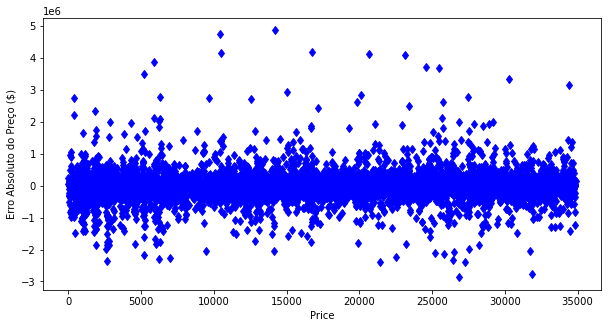

In [140]:
erro = test_y - pred_y

plt.figure(figsize=(10,5))
plt.plot(erro, 'bd')
plt.ylabel('Erro Absoluto do Preço ($)')
plt.xlabel('Price')
plt.show()

C:\Users\Fernando Nast\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


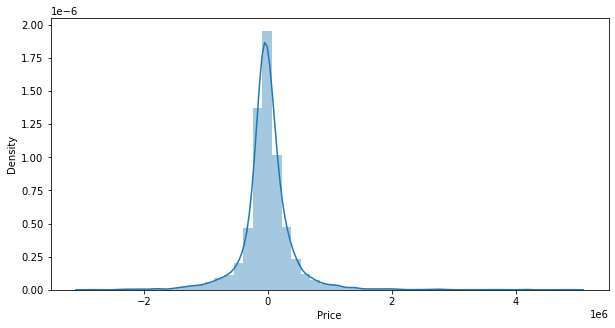

In [141]:
plt.figure(figsize=(10,5))
sns.distplot((test_y - pred_y))
plt.show()